**<font  size=6>策略回測結果報告</font>**


In [107]:
# %%
import pandas as pd
import numpy as np
import pyodbc
import warnings
warnings.filterwarnings("ignore")
from datetime import timedelta
import datetime
from interval3 import Interval, IntervalSet
from tqdm import tqdm
from importlib import reload
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_columns', 150)
from sqlalchemy import create_engine
from matplotlib import pyplot as plt
import os

from matplotlib.font_manager import FontProperties
myfont=FontProperties(fname=r'C:\Users\chiehlinchen\Desktop\msj.ttf',size=14)
# sns.set(font=myfont.get_family(), rc={'figure.figsize':(5,4)}, font_scale= 2)
# sns.set_style("whitegrid",{"font.sans-serif":['Microsoft JhengHei']})
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']
plt.rcParams['axes.unicode_minus'] =False
plt.rcParams['axes.facecolor']='whitesmoke'


**<font  size=5>開盤漲1%進場</font>**

**<font  size=4>9%停利3%停損</font>**

In [109]:
transactions = pd.read_csv(r"Z:\07個人\ChiehLin\數位金融部修正回測結果\決定版\一分k\開盤漲1%進場9%停利3%停損.csv")
transactions.date = pd.to_datetime(transactions.date).dt.strftime("%Y%m%d")
returns = transactions.groupby(['date','symbol']).agg({"value":'sum'}).reset_index(drop = False)
returns['returns'] =returns['value']/transactions[transactions['value'] > 0].reset_index(drop = True)['value']
returns = returns.rename(columns = {'date':'日期','returns' :'開盤漲1%進場9%停利3%停損策略收益(不加成本)'})
returns['開盤漲1%進場9%停利3%停損策略收益(0.15%成本)'] =  returns['開盤漲1%進場9%停利3%停損策略收益(不加成本)'] - 0.0015
returns['開盤漲1%進場9%停利3%停損策略收益(0.335%成本)'] =  returns['開盤漲1%進場9%停利3%停損策略收益(不加成本)'] - 0.00335
returns['開盤漲1%進場9%停利3%停損策略收益(0.435%成本)'] =  returns['開盤漲1%進場9%停利3%停損策略收益(不加成本)'] - 0.00435

In [110]:
returns_day = returns.groupby('日期').agg({'開盤漲1%進場9%停利3%停損策略收益(0.15%成本)':'mean', '開盤漲1%進場9%停利3%停損策略收益(0.335%成本)': 'mean', '開盤漲1%進場9%停利3%停損策略收益(0.435%成本)':'mean'})
returns_day['累積開盤漲1%進場9%停利3%停損策略收益(0.15%成本)'] = returns_day['開盤漲1%進場9%停利3%停損策略收益(0.15%成本)'].cumsum()
returns_day['累積開盤漲1%進場9%停利3%停損策略收益(0.335%成本)'] = returns_day['開盤漲1%進場9%停利3%停損策略收益(0.335%成本)'].cumsum()
returns_day['累積開盤漲1%進場9%停利3%停損策略收益(0.435%成本)'] = returns_day['開盤漲1%進場9%停利3%停損策略收益(0.435%成本)'].cumsum()

<AxesSubplot: ylabel='Frequency'>

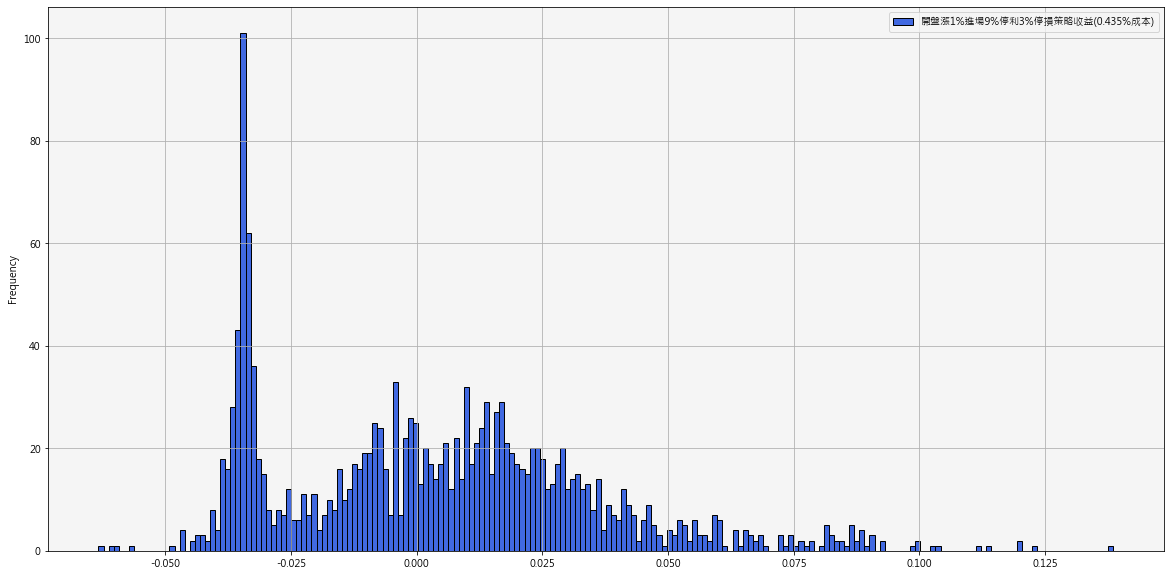

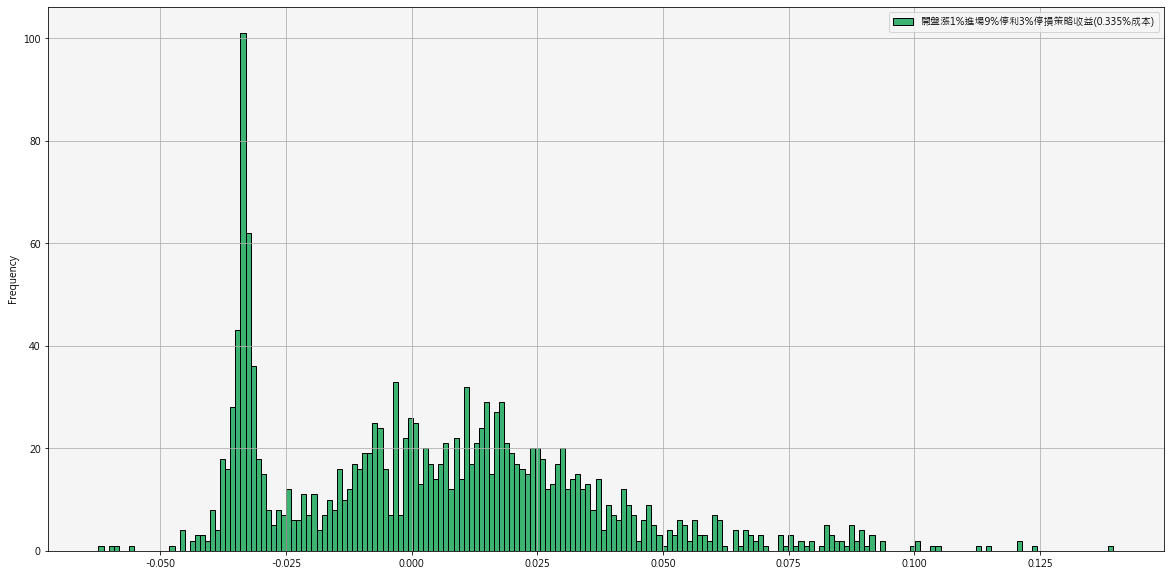

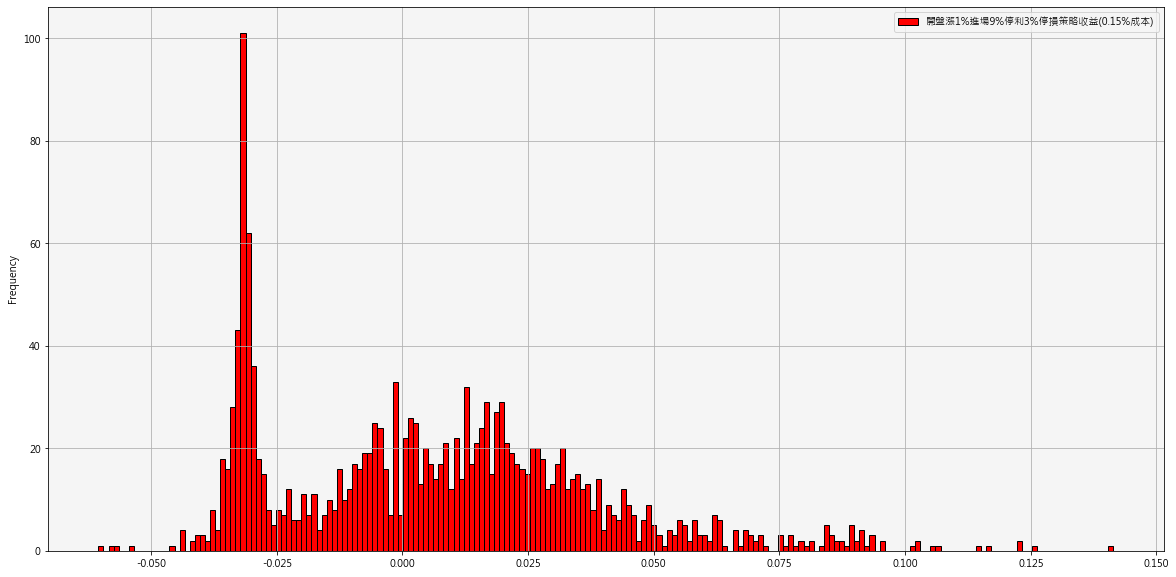

In [112]:
############################################################################################
#每日每股損益分配
#開盤漲1%進場9%停利3%停損
############################################################################################
returns[['開盤漲1%進場9%停利3%停損策略收益(0.435%成本)']].plot.hist(edgecolor='black', facecolor = 'royalblue',figsize = (20,10),bins=200,grid = True)
returns[['開盤漲1%進場9%停利3%停損策略收益(0.335%成本)']].plot.hist(edgecolor='black', facecolor = 'mediumseagreen',figsize = (20,10),bins=200,grid = True)
returns[['開盤漲1%進場9%停利3%停損策略收益(0.15%成本)']].plot.hist(edgecolor='black', facecolor = 'red',figsize = (20,10),bins=200,grid = True)

In [113]:
returns[['開盤漲1%進場9%停利3%停損策略收益(0.435%成本)','開盤漲1%進場9%停利3%停損策略收益(0.335%成本)','開盤漲1%進場9%停利3%停損策略收益(0.15%成本)']].describe().iloc[1:,:]

,開盤漲1%進場9%停利3%停損策略收益(0.435%成本),開盤漲1%進場9%停利3%停損策略收益(0.335%成本),開盤漲1%進場9%停利3%停損策略收益(0.15%成本)
mean,0.003457,0.004457,0.006307
std,0.031438,0.031438,0.031438
min,-0.063332,-0.062332,-0.060482
25%,-0.025570,-0.024570,-0.022720
50%,0.002379,0.003379,0.005229
75%,0.022680,0.023680,0.025530
max,0.138507,0.139507,0.141357


<AxesSubplot: ylabel='Frequency'>

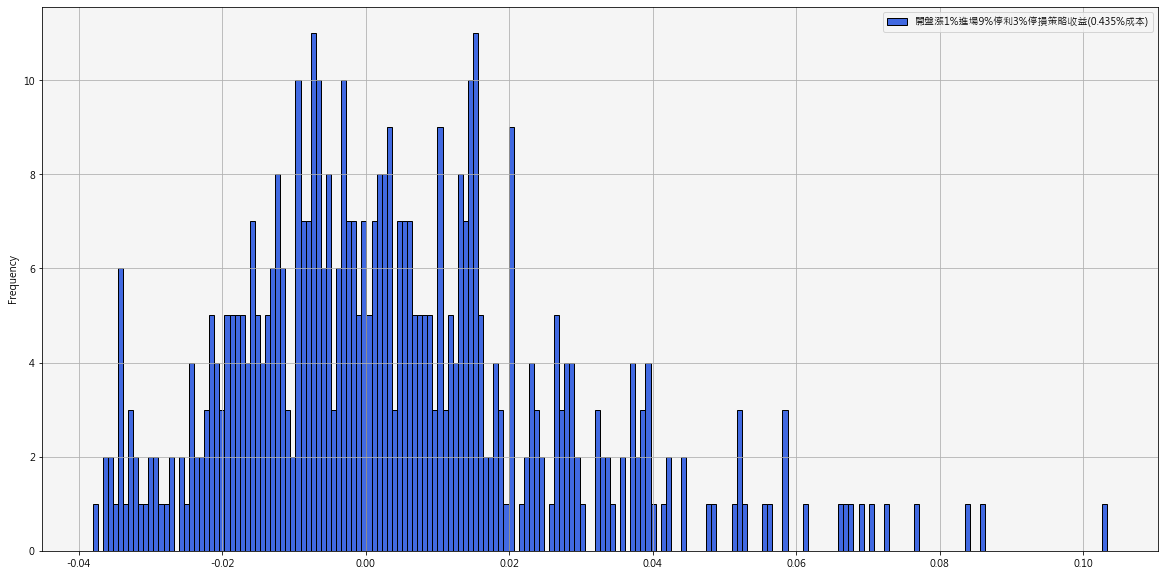

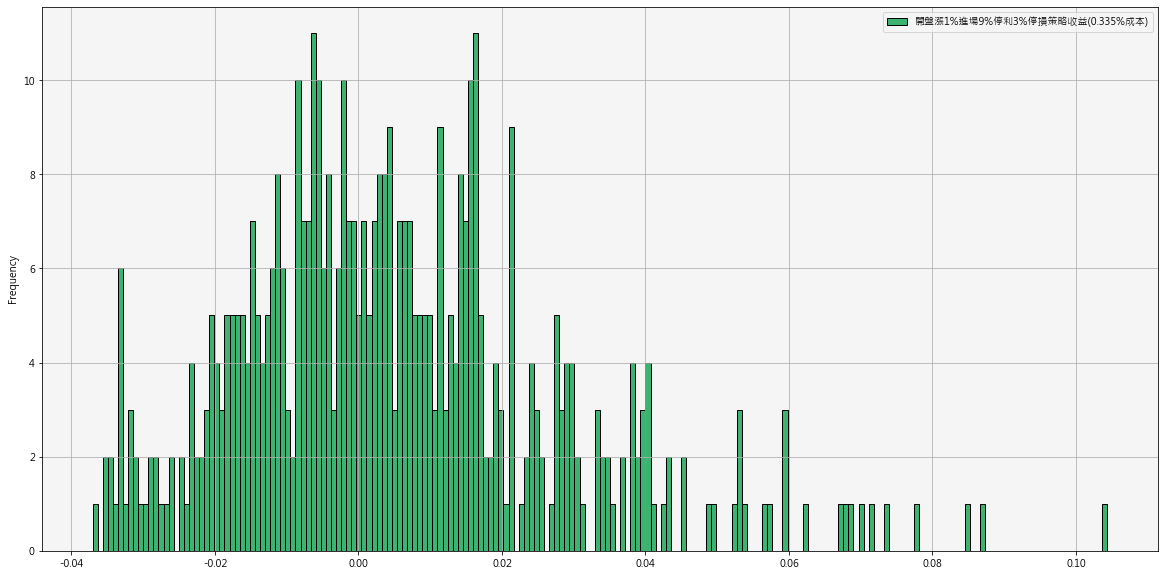

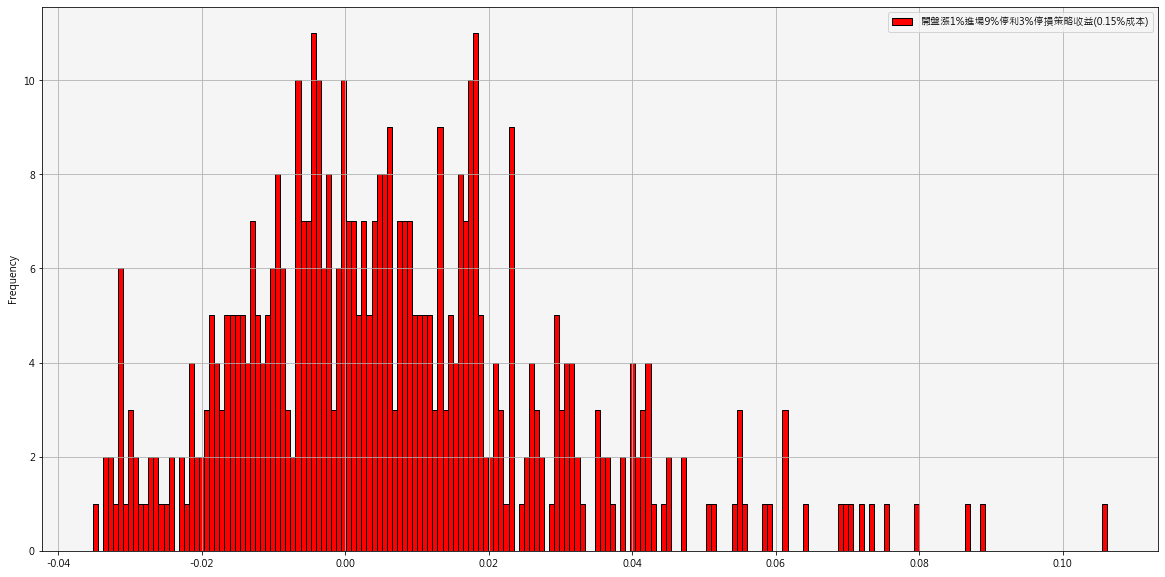

In [114]:
############################################################################################
#每日平均損益分配
#開盤漲1%進場9%停利3%停損
############################################################################################
returns_day[['開盤漲1%進場9%停利3%停損策略收益(0.435%成本)']].plot.hist(edgecolor='black', facecolor = 'royalblue',figsize = (20,10),bins=200,grid = True)
returns_day[['開盤漲1%進場9%停利3%停損策略收益(0.335%成本)']].plot.hist(edgecolor='black', facecolor = 'mediumseagreen',figsize = (20,10),bins=200,grid = True)
returns_day[['開盤漲1%進場9%停利3%停損策略收益(0.15%成本)']].plot.hist(edgecolor='black', facecolor = 'red',figsize = (20,10),bins=200,grid = True)

In [115]:
returns_day[['開盤漲1%進場9%停利3%停損策略收益(0.435%成本)','開盤漲1%進場9%停利3%停損策略收益(0.335%成本)','開盤漲1%進場9%停利3%停損策略收益(0.15%成本)']].describe().iloc[1:,:]

,開盤漲1%進場9%停利3%停損策略收益(0.435%成本),開盤漲1%進場9%停利3%停損策略收益(0.335%成本),開盤漲1%進場9%停利3%停損策略收益(0.15%成本)
mean,0.004075,0.005075,0.006925
std,0.022281,0.022281,0.022281
min,-0.038065,-0.037065,-0.035215
25%,-0.010598,-0.009598,-0.007748
50%,0.001519,0.002519,0.004369
75%,0.015026,0.016026,0.017876
max,0.103342,0.104342,0.106192


<AxesSubplot: xlabel='日期'>

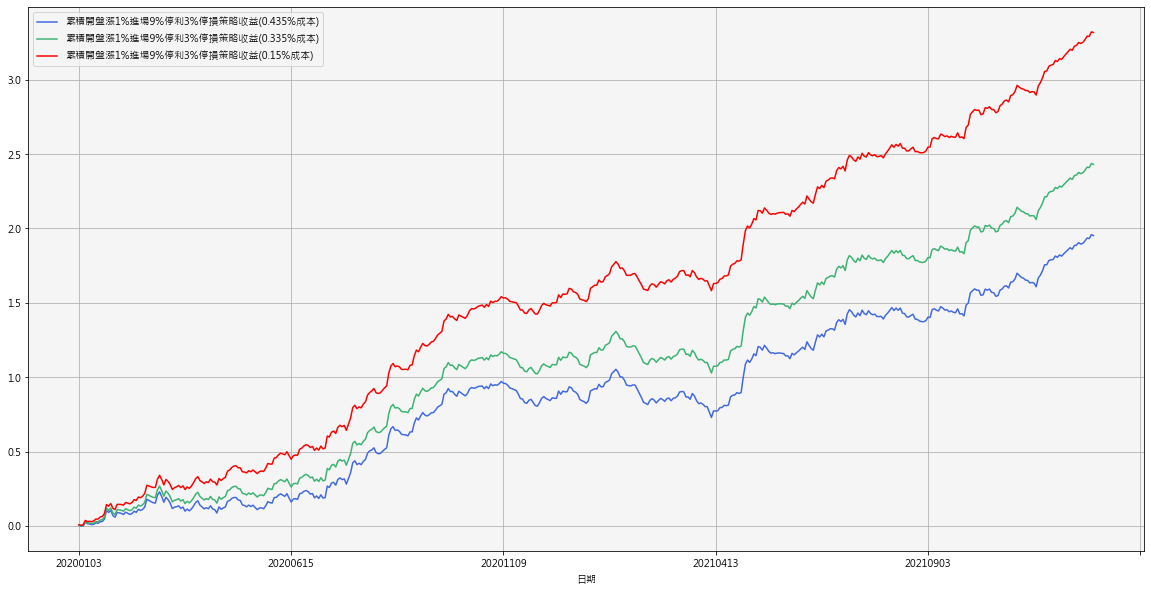

In [116]:
returns_day[['累積開盤漲1%進場9%停利3%停損策略收益(0.435%成本)','累積開盤漲1%進場9%停利3%停損策略收益(0.335%成本)','累積開盤漲1%進場9%停利3%停損策略收益(0.15%成本)']].plot(figsize=(20, 10),color = ['royalblue','mediumseagreen','red'],grid = True)

**<font  size=4>3%停利1%停損</font>**

In [98]:
transactions = pd.read_csv(r"Z:\07個人\ChiehLin\數位金融部修正回測結果\決定版\開盤漲1%進場3%停利1%停損.csv")
transactions.date = pd.to_datetime(transactions.date).dt.strftime("%Y%m%d")
returns = transactions.groupby(['date','symbol']).agg({"value":'sum'}).reset_index(drop = False)
returns['returns'] =returns['value']/transactions[transactions['value'] > 0].reset_index(drop = True)['value']
returns = returns.rename(columns = {'date':'日期','returns' :'開盤漲1%進場3%停利1%停損策略收益(不加成本)'})
returns['開盤漲1%進場3%停利1%停損策略收益(0.15%成本)'] =  returns['開盤漲1%進場3%停利1%停損策略收益(不加成本)'] - 0.0015
returns['開盤漲1%進場3%停利1%停損策略收益(0.335%成本)'] =  returns['開盤漲1%進場3%停利1%停損策略收益(不加成本)'] - 0.00335
returns['開盤漲1%進場3%停利1%停損策略收益(0.435%成本)'] =  returns['開盤漲1%進場3%停利1%停損策略收益(不加成本)'] - 0.00435

In [106]:
transactions = pd.read_csv(r"Z:\07個人\ChiehLin\數位金融部修正回測結果\決定版\開盤漲1%進場3%停利1%停損.csv")
transactions

,date,amount,price,sid,symbol,value
0,2020-01-03 09:10:00+00:00,-26000,38.750,46,4760,1007500.0
1,2020-01-03 09:12:00+00:00,-5000,179.500,280,5289,897500.0
2,2020-01-03 10:43:00+00:00,5000,174.115,280,5289,-870575.0
3,2020-01-03 13:21:00+00:00,26000,38.650,46,4760,-1004900.0
4,2020-01-06 09:12:00+00:00,-11000,86.700,38,6531,953700.0
...,...,...,...,...,...,...
2595,2021-12-29 09:14:00+00:00,30000,32.623,225,3294,-978690.0
2596,2021-12-29 12:26:00+00:00,-19000,50.500,87,1727,959500.0
2597,2021-12-29 12:30:00+00:00,19000,51.005,87,1727,-969095.0
2598,2021-12-29 12:31:00+00:00,-9000,106.000,19,3167,954000.0


In [99]:
returns_day = returns.groupby('日期').agg({'開盤漲1%進場3%停利1%停損策略收益(0.15%成本)':'mean', '開盤漲1%進場3%停利1%停損策略收益(0.335%成本)': 'mean', '開盤漲1%進場3%停利1%停損策略收益(0.435%成本)':'mean'})
returns_day['累積開盤漲1%進場3%停利1%停損策略收益(0.15%成本)'] = returns_day['開盤漲1%進場3%停利1%停損策略收益(0.15%成本)'].cumsum()
returns_day['累積開盤漲1%進場3%停利1%停損策略收益(0.335%成本)'] = returns_day['開盤漲1%進場3%停利1%停損策略收益(0.335%成本)'].cumsum()
returns_day['累積開盤漲1%進場3%停利1%停損策略收益(0.435%成本)'] = returns_day['開盤漲1%進場3%停利1%停損策略收益(0.435%成本)'].cumsum()

<AxesSubplot: ylabel='Frequency'>

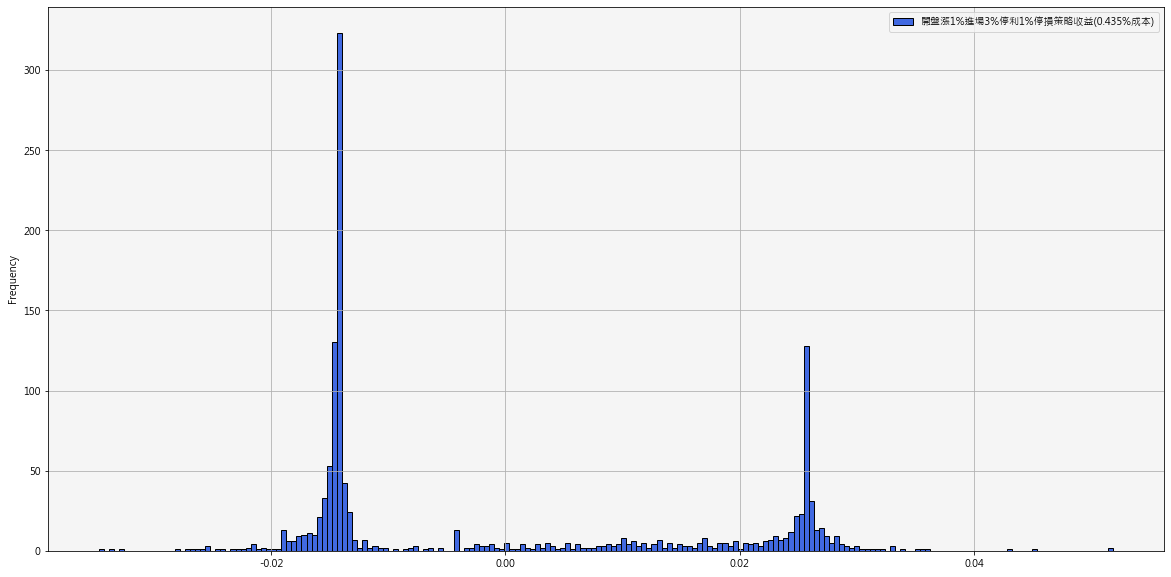

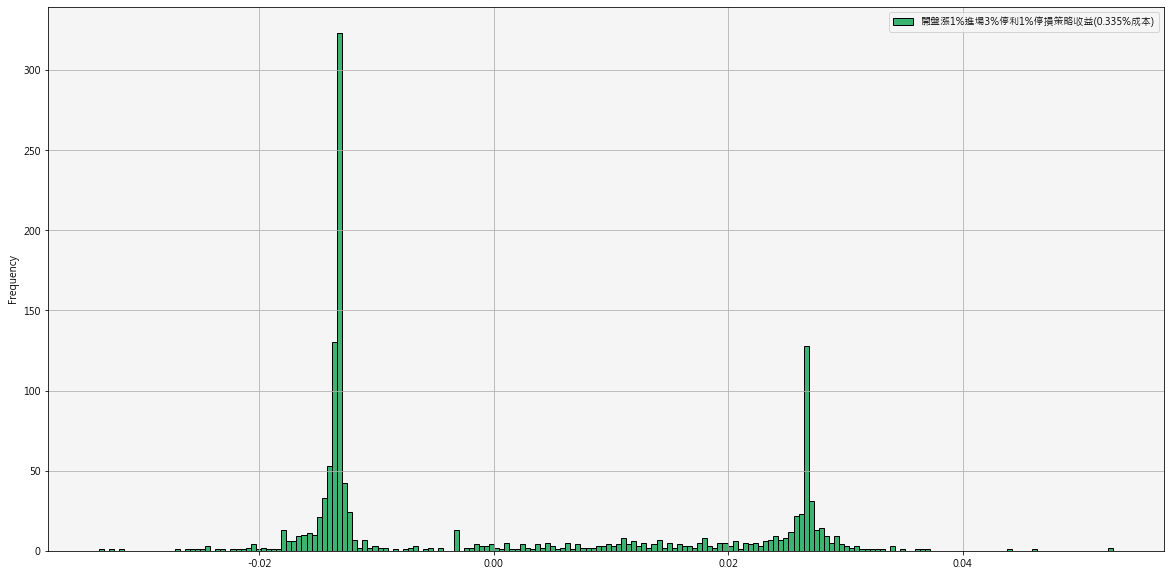

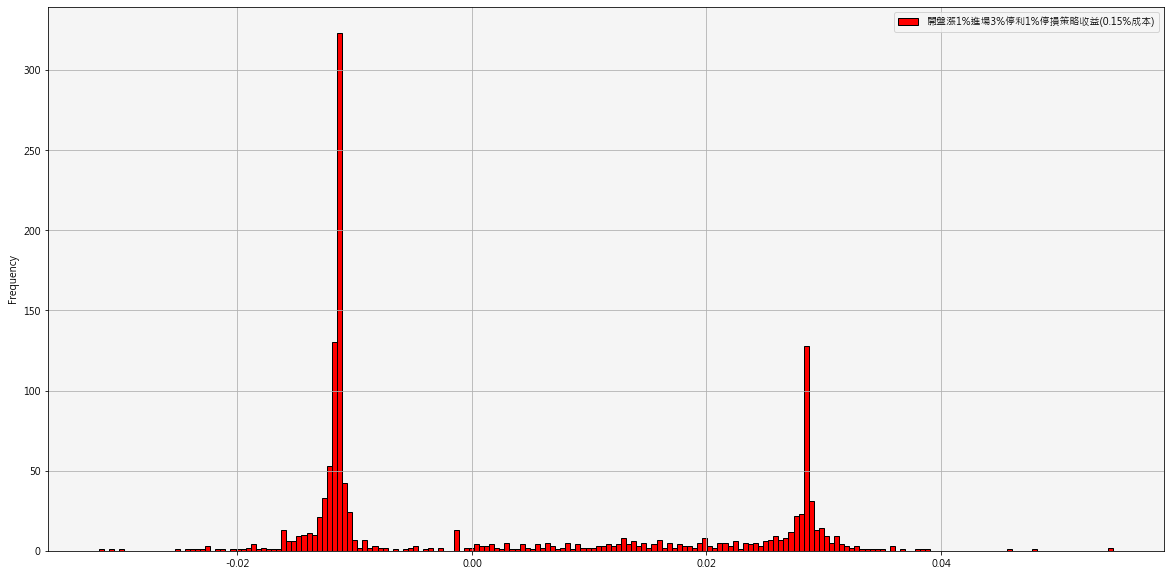

In [100]:
############################################################################################
#每日每股損益分配
#開盤漲1%進場3%停利1%停損
############################################################################################
returns[['開盤漲1%進場3%停利1%停損策略收益(0.435%成本)']].plot.hist(edgecolor='black', facecolor = 'royalblue',figsize = (20,10),bins=200,grid = True)
returns[['開盤漲1%進場3%停利1%停損策略收益(0.335%成本)']].plot.hist(edgecolor='black', facecolor = 'mediumseagreen',figsize = (20,10),bins=200,grid = True)
returns[['開盤漲1%進場3%停利1%停損策略收益(0.15%成本)']].plot.hist(edgecolor='black', facecolor = 'red',figsize = (20,10),bins=200,grid = True)

In [101]:
returns[['開盤漲1%進場3%停利1%停損策略收益(0.435%成本)','開盤漲1%進場3%停利1%停損策略收益(0.335%成本)','開盤漲1%進場3%停利1%停損策略收益(0.15%成本)']].describe().iloc[1:,:]

,開盤漲1%進場3%停利1%停損策略收益(0.435%成本),開盤漲1%進場3%停利1%停損策略收益(0.335%成本),開盤漲1%進場3%停利1%停損策略收益(0.15%成本)
mean,-0.000417,0.000583,0.002433
std,0.018278,0.018278,0.018278
min,-0.034698,-0.033698,-0.031848
25%,-0.014372,-0.013372,-0.011522
50%,-0.013941,-0.012941,-0.011091
75%,0.022361,0.023361,0.025211
max,0.051829,0.052829,0.054679


<AxesSubplot: ylabel='Frequency'>

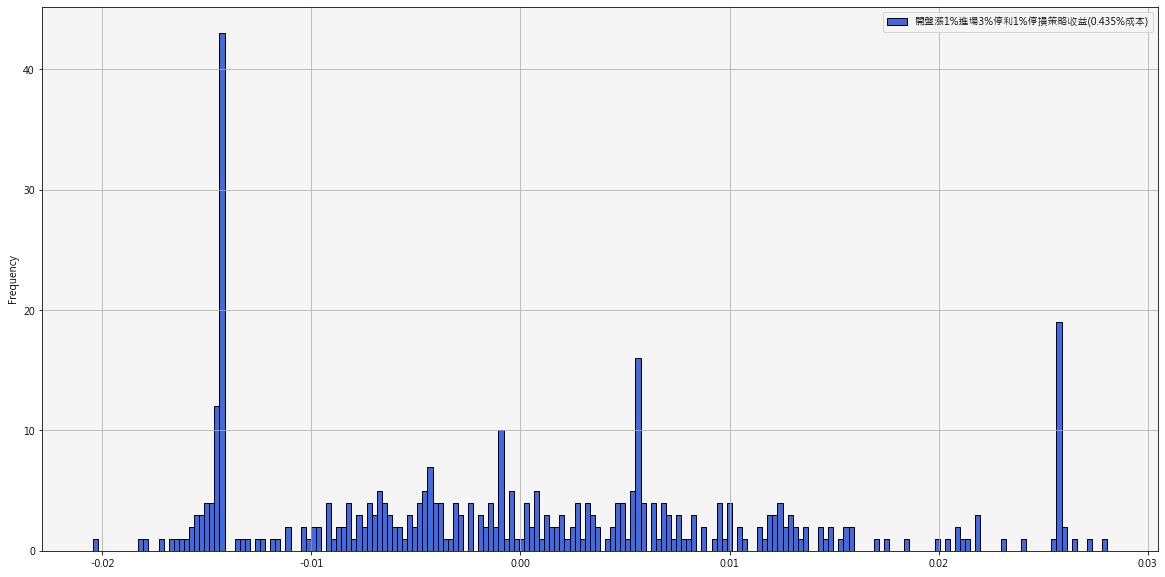

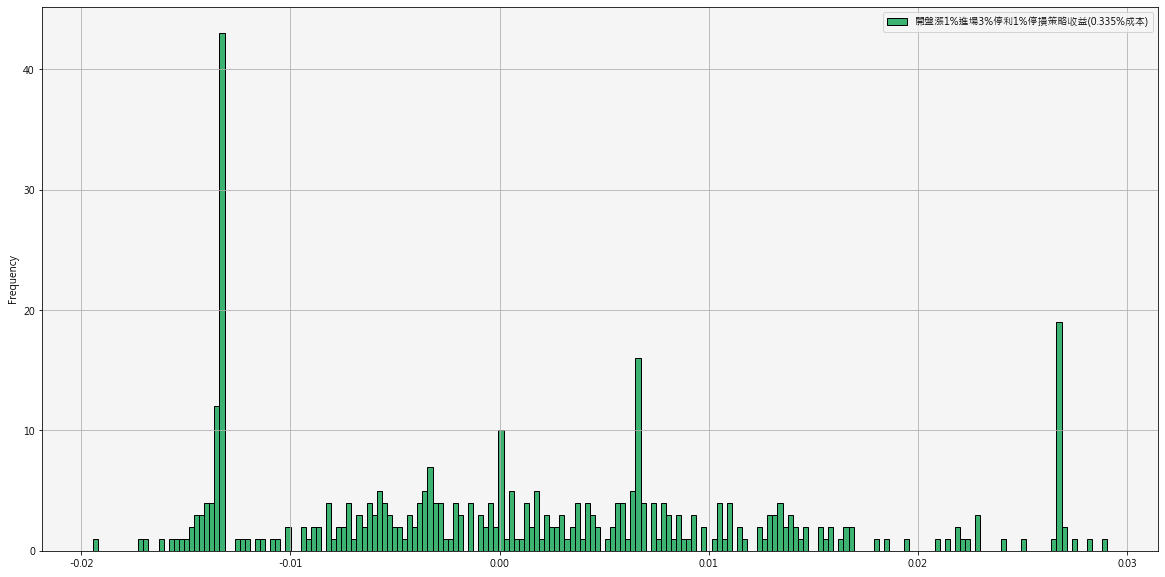

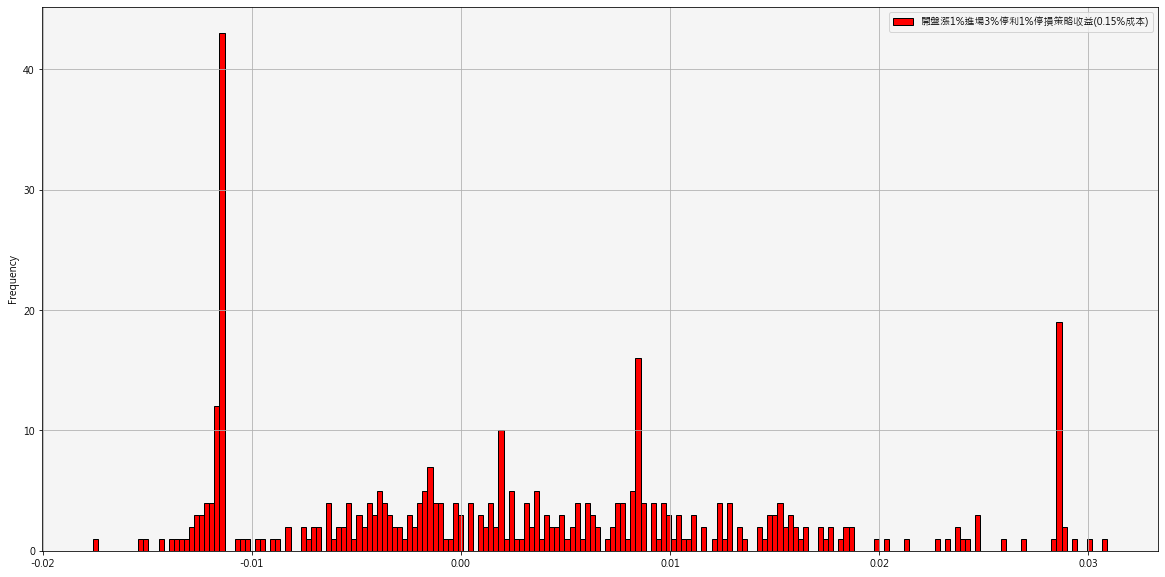

In [102]:
############################################################################################
#每日平均損益分配
#開盤漲1%進場9%停利3%停損
############################################################################################
returns_day[['開盤漲1%進場3%停利1%停損策略收益(0.435%成本)']].plot.hist(edgecolor='black', facecolor = 'royalblue',figsize = (20,10),bins=200,grid = True)
returns_day[['開盤漲1%進場3%停利1%停損策略收益(0.335%成本)']].plot.hist(edgecolor='black', facecolor = 'mediumseagreen',figsize = (20,10),bins=200,grid = True)
returns_day[['開盤漲1%進場3%停利1%停損策略收益(0.15%成本)']].plot.hist(edgecolor='black', facecolor = 'red',figsize = (20,10),bins=200,grid = True)

In [103]:
returns_day[['開盤漲1%進場3%停利1%停損策略收益(0.435%成本)','開盤漲1%進場3%停利1%停損策略收益(0.335%成本)','開盤漲1%進場3%停利1%停損策略收益(0.15%成本)']].describe().iloc[1:,:]

,開盤漲1%進場3%停利1%停損策略收益(0.435%成本),開盤漲1%進場3%停利1%停損策略收益(0.335%成本),開盤漲1%進場3%停利1%停損策略收益(0.15%成本)
mean,0.000200,0.001200,0.003050
std,0.011855,0.011855,0.011855
min,-0.020452,-0.019452,-0.017602
25%,-0.009080,-0.008080,-0.006230
50%,-0.001017,-0.000017,0.001833
75%,0.006996,0.007996,0.009846
max,0.028057,0.029057,0.030907


<AxesSubplot: xlabel='日期'>

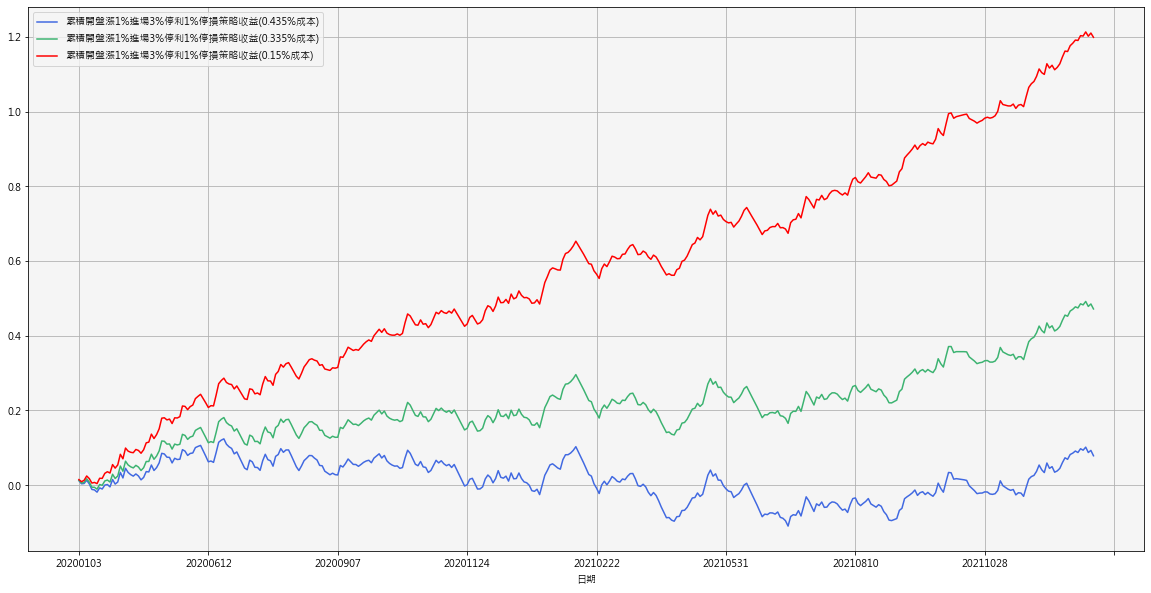

In [104]:
returns_day[['累積開盤漲1%進場3%停利1%停損策略收益(0.435%成本)','累積開盤漲1%進場3%停利1%停損策略收益(0.335%成本)','累積開盤漲1%進場3%停利1%停損策略收益(0.15%成本)']].plot(figsize=(20, 10),color = ['royalblue','mediumseagreen','red'],grid = True)